**Проект: Принятие решений в бизнесе на основе данных**

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Шаг 1. Загрузка библиотек и предобработка данных.**
1. Загрузим библиотеки.
2. Предобработаем датасет hypothesis.
3. Предобработаем датасет orders.
4. Предобработаем датасет visitors.

**Шаг 2. Приоритизация гипотез.**
1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Шаг 3. Анализ А/В-теста**
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его:
- остановить тест, зафиксировать победу одной из групп;
- остановить тест, зафиксировать отсутствие различий между группами;
- продолжить тест.


**Шаг 1. Загрузка библиотек и предобработка данных.**

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import math as mth

Предобработаем датасет hypothesis.

In [2]:
# Загрузим датасет hypothesis и узнаем информацию о нем
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.info()
hypothesis.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
# Проверим дубликаты
hypothesis.duplicated().sum()

0

Предобработаем датасет orders.

In [4]:
# Загрузим датасет orders и узнаем информацию о нем
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# Проверим дубликаты
orders.duplicated().sum()

0

In [6]:
# Поменяем тип данных столбца date на datetime64
orders['date'] = pd.to_datetime(orders['date'])

In [7]:
# Проверим изменение
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Предобработаем датасет visitors.

In [8]:
# Загрузим датасет visitors и узнаем информацию о нем
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# Проверим дубликаты
visitors.duplicated().sum()

0

In [10]:
# Поменяем тип данных столбца date на datetime64
visitors['date'] = pd.to_datetime(visitors['date'])

In [11]:
# Проверим изменение
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод**

Изучили данные. Изменили тип данных столбца date с object на datetime64 в датасетах **orders** и **visitors**. Дубликатов и пропусков нет.

In [12]:
# Считаем количество уникальных пользователей участвующих в тесте
orders['visitorId'].nunique()

1031

In [13]:
# Считаем как разбиты по группам пользователи
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

Посчитали количество пользователей, участвующих в тесте и как они разбиты по группам. Группы распределены не равномерно. Так же видим, что разбив пользователей по группам, сумма пользователей вышла больше, чем посчитано уникальных пользователей. Значит есть пользователи, которые входят в обе группы.

In [14]:
# Проверим есть ли пользователи которые входят в обе группы
orders_a = orders[orders['group'] == 'A']['visitorId']
orders_b = orders[orders['group'] == 'B']['visitorId']
orders_ab = orders.query('visitorId in @orders_a and visitorId in @orders_b')
orders_ab['visitorId'].nunique()

58

Видим, что есть пользователи, которые входят в обе группы. Обычно, таких пользователей вычищают при анализе.

**Шаг 2. Приоритизация гипотез.**

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [15]:
pd.set_option('display.max_colwidth', 0)
hypothesis['Ice'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis.sort_values(by='Ice', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


**Вывод:**

Приоритетными гипотезы по ICE оказались:
- Запустить акцию, дающую скидку на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [16]:
hypothesis['Rice'] = ((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis.sort_values(by='Rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


**Вывод:**

Приоритетными гипотезы по RICE оказались:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Приоритетными гипотезы по ICE оказались:**
- Запустить акцию, дающую скидку на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Приоритетными гипотезы по RICE оказались:**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Приоритетные гипотезы по применимым фреймворкам ICE и RICE разные из-за того, что фреймворк RICE учитывает охват пользователей по 10-балльной шкале (параметр Reach), он повлиял на приоритетность гипотез.

**Шаг 3. Анализ А/В-теста**

In [17]:
# Сделаем массив уникальных пар значений даты и группы
ordersGroups = orders[['date', 'group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = ordersGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis = 1).sort_values(by=['date','group'])

# Получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = ordersGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis = 1).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данных

cummulativeDate = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on=['date', 'group'])
cummulativeDate.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [18]:
# Посмотрим что получилось
cummulativeDate.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

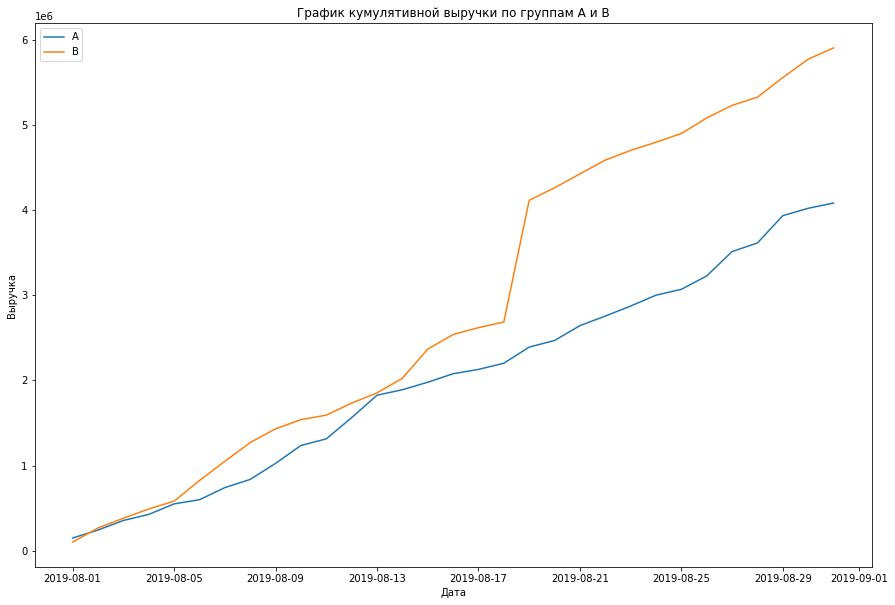

In [19]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручки по дням в группе А
cummulativeRevenueA = cummulativeDate[cummulativeDate['group'] == 'A'][['date', 'revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручки по дням в группе B
cummulativeRevenueB = cummulativeDate[cummulativeDate['group'] == 'B'][['date', 'revenue', 'orders']]

# Настроим график
plt.figure(figsize = (15,10))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам А и В')
# Построим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label = 'A')

# Построим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label = 'B')

plt.legend()

**Вывод**

В обоих группах выручка растет. В группе В выручки чуть больше, чем в группе А. Но, в группе В замечен сильный скачок между 18 и 20 августа. Возможно, в эти даты произошли очень дорогие заказы.

**2. Постром график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

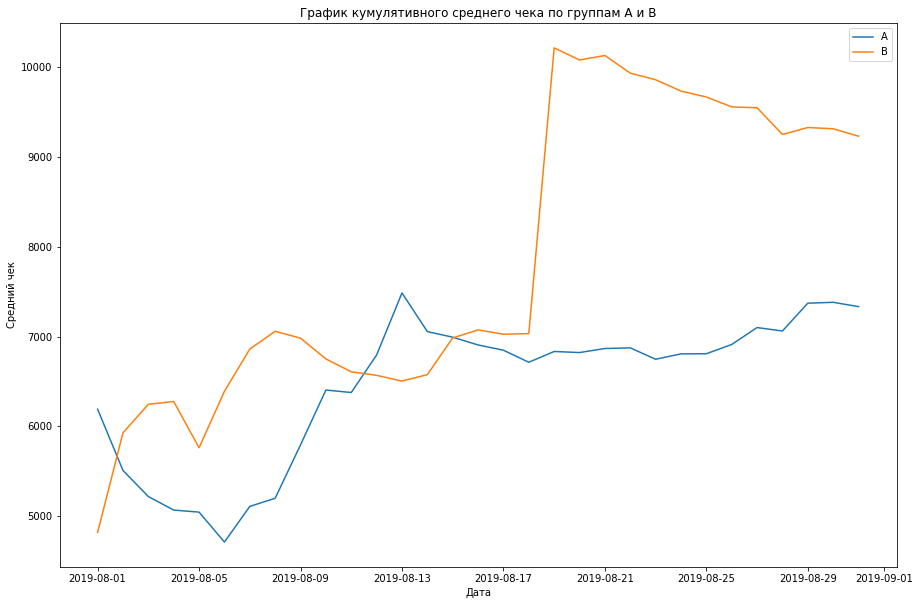

In [20]:
# Настроим график
plt.figure(figsize = (15,10))
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам А и В')

# Построим график среднего чека по группам
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'] / cummulativeRevenueA['orders'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'] / cummulativeRevenueB['orders'], label = 'B')
plt.legend()

**Вывод**

График похож на график кумулятивной выручки. В первой половине месяца чек группы В был выше чем группы А. В районе 13 августа чек группы А был выше чека группы В, и в последующие даты чек группы А почти стабильно держался на одном уровне. На чек группы В сильно повлияли выброс, замеченный в графике кумулятивной выручки. Но потом, средний чек группы В начал снижаться. Есть предположение, что в итоге средний чек группы В продолжит снижение, но в итоге стабилизируется в районе среднего чека группы А.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

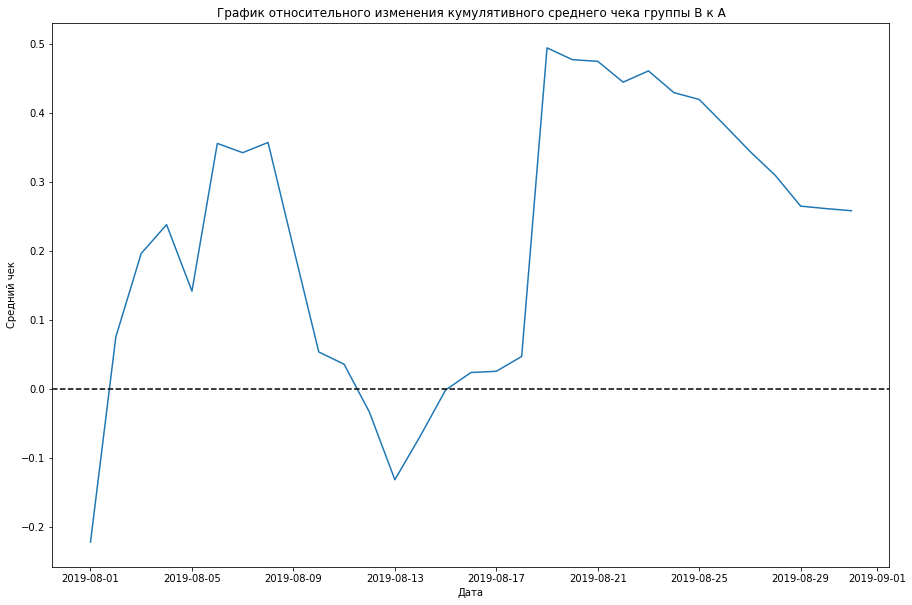

In [21]:
# Соберем данные в одном датафрейме
mergedcummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

# Настроим график
plt.figure(figsize = (15,10))
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего чека группы В к А')

# Построим график отношения средних чеков
plt.plot(mergedcummulativeRevenue['date'], (mergedcummulativeRevenue['revenueB'] / mergedcummulativeRevenue['ordersB']) / (mergedcummulativeRevenue['revenueA'] / mergedcummulativeRevenue['ordersA']) - 1)

# Добавляем ось Х
plt.axhline(y = 0, color = 'black', linestyle = '--')


**Вывод**

Вывод по сути аналогичный с выводами п.1 и п.2.
Средний чек группы В уже со 2 августа превысил средний чек группы А, и вплодь до 10 августа был выше, хотя и имел тенденцию к снижению, причем резкую, начная с 8 августа. Потом был резкий рост как раз с 18 по 20 августа. После имеет тенденцию к не резкому, но снижению. В период с 18 по 20 августа явно есть аномалии.

**4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

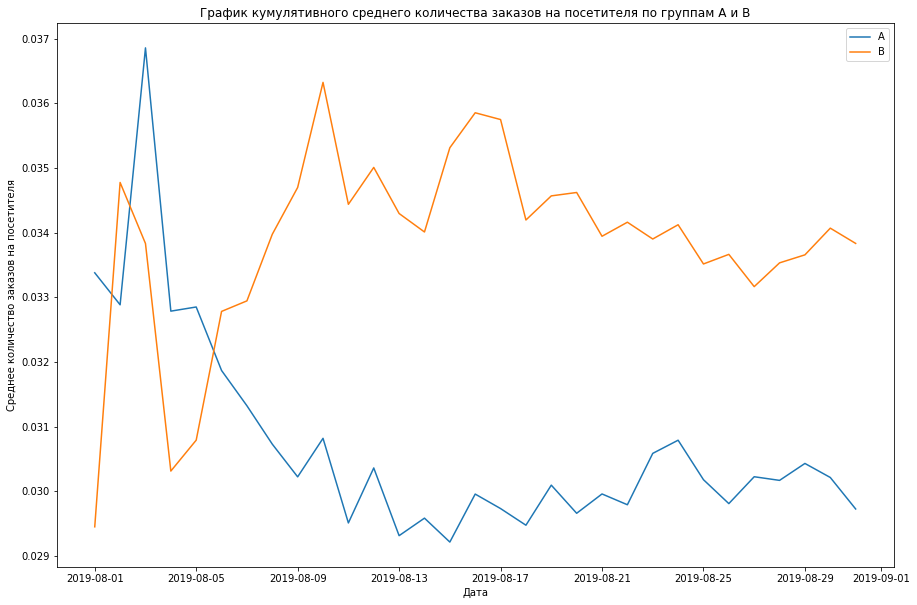

In [22]:
# Добавляем колонку и считаем среднее количество заказов на посетителя по группам
cummulativeDate['conversion'] = cummulativeDate['orders'] / cummulativeDate['visitors']

# Датафрейм с кумулятивным средним количеством заказов на посетителя в группе А
cummulativeConversionA = cummulativeDate[cummulativeDate['group'] == 'A']

# Датафрейм с кумулятивным средним количеством заказов на посетителя в группе А
cummulativeConversionB = cummulativeDate[cummulativeDate['group'] == 'B']

# Настроим график
plt.figure(figsize = (15,10))
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам А и В')

# Построим график группы А
plt.plot(cummulativeConversionA['date'], cummulativeConversionA['conversion'], label = 'A')

# Построим график группы B
plt.plot(cummulativeConversionB['date'], cummulativeConversionB['conversion'], label = 'B')

plt.legend()

**Вывод**

В начале месяца количество заказов на посетителя группы А была больше, чем группы В, но они обе росли. Примерно с 3 августа количество заказов на посетителя обоих групп резко упало. Но если группа А продолжила падать, то количество заказов на посетителя группы В с 5 августа начала расти и примерно стабилизировалась к 13 августа и до конца месяца было значительно больше, чем количество заказов на посетителя группы А.

**5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

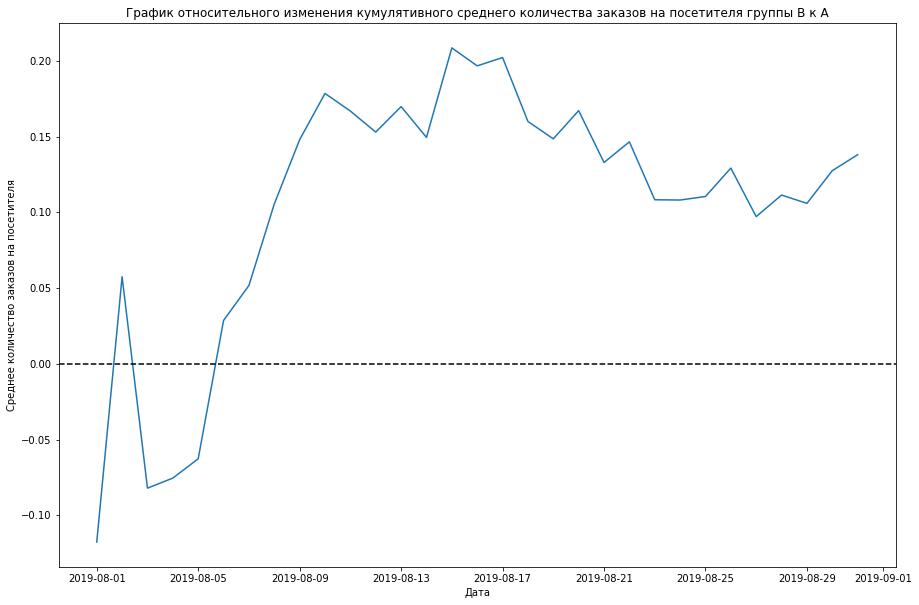

In [23]:
# Соберем данные в одном датафрейме
mergedcummulativeConversion = cummulativeConversionA[['date', 'conversion']].merge(cummulativeConversionB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

# Настроим график
plt.figure(figsize = (15,10))
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к А')

# Построим график отношения средних чеков
plt.plot(mergedcummulativeConversion['date'], (mergedcummulativeConversion['conversionB'] / mergedcummulativeConversion['conversionA']) - 1)

# Добавляем ось Х
plt.axhline(y = 0, color = 'black', linestyle = '--')

**Вывод**

В целом, почти весь месяц среднее количество заказов на посетителя группы В выше, чем среднее количество заказов на посетителя группы А. Начиная с 9 августа и до конца месяца среднее количество заказов на посетителя группы В колебается в районе 10-15%. Пока сложно сделать вывод, потому что мы видели что скорее всего, существует аномалия в группе В.

**6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

Text(0.5, 1.0, 'График количества заказов по пользователям')

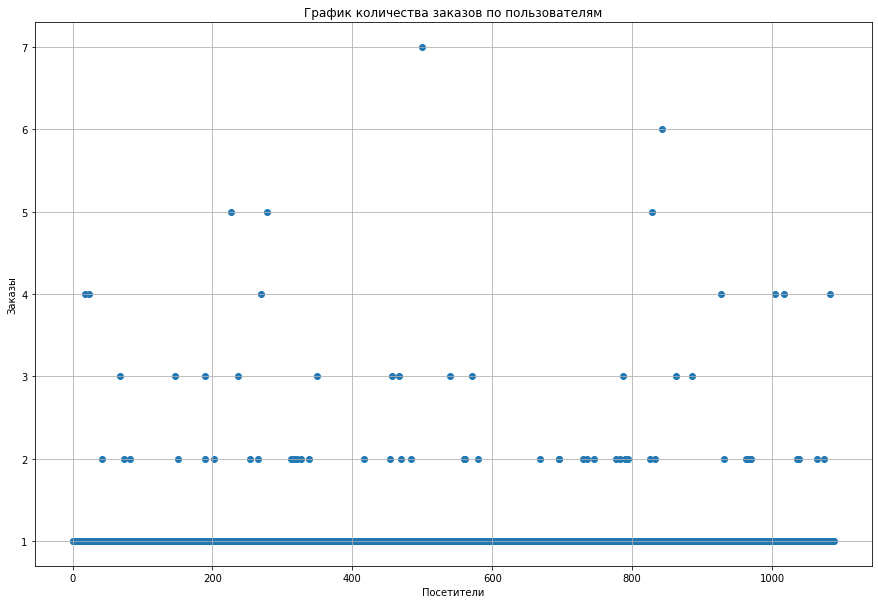

In [24]:
# Сгруппируем данные
ordersVisitor = orders.groupby(['group', 'visitorId'], as_index = False).agg({'transactionId': 'nunique'})
ordersVisitor.columns = ['visitorId', 'group', 'orders']
x_values = pd.Series(range(0,len(ordersVisitor)))
# Настроим график
plt.figure(figsize = (15,10))
plt.scatter(x_values, ordersVisitor['orders'])
plt.xlabel('Посетители')
plt.ylabel('Заказы')
plt.grid()
plt.title('График количества заказов по пользователям')

**Вывод**

Самое большое количество пользователей совершили по 1-2 заказа. Мы видим явные аномалии которые идут от 3 заказов и выше. Будем разбираться. Посчитаем процентили.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [25]:
percentileorders = np.percentile(ordersVisitor['orders'], [95, 99])
print('Pencentile:\n95: {} \n99: {}'.format(percentileorders[0], percentileorders[1]))

Pencentile:
95: 2.0 
99: 4.0


**Вывод**

Можно сделать вывод что не больше 5% пользователей совершает больше 2 заказов, и не больше 1% совершают больше 4 заказов.

Выберем 2 заказа как верхнюю границу, и будем отсеивать аномалии по ней.

**8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'График количества заказов по пользователям')

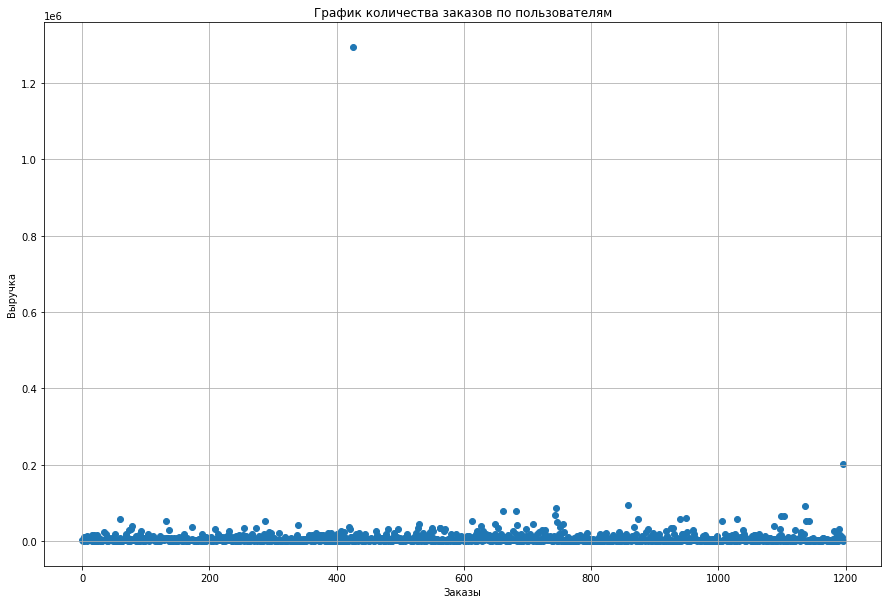

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
# Настроим график
plt.figure(figsize = (15,10))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Выручка')
plt.grid()
plt.title('График количества заказов по пользователям')

Построим тот же график, убрав выбросы.

Text(0.5, 1.0, 'График количества заказов по пользователям')

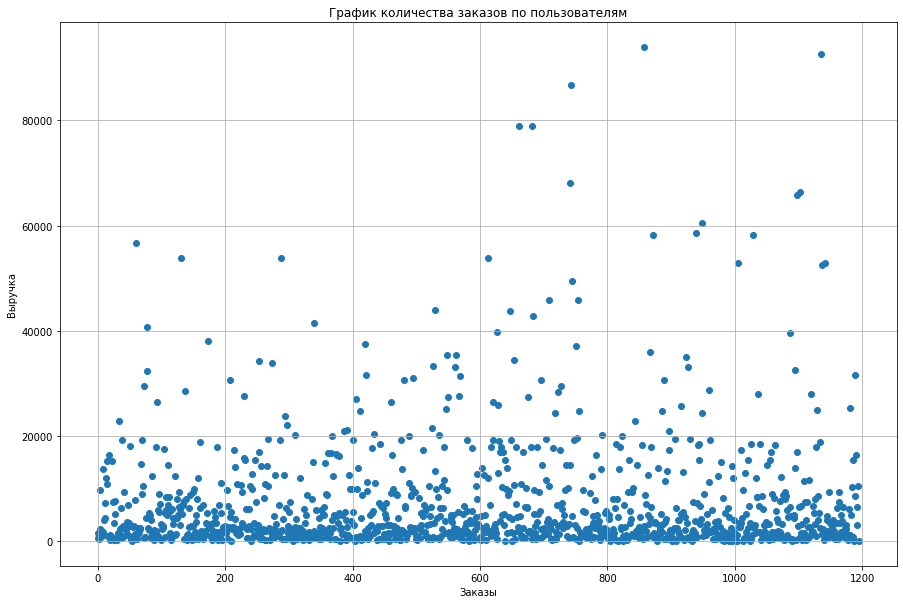

In [27]:
order_filter = orders[orders['revenue'] <= 200000]['revenue']
x_values_filter = pd.Series(range(0,len(order_filter)))
# Настроим график
plt.figure(figsize = (15,10))
plt.scatter(x_values_filter, order_filter)
plt.xlabel('Заказы')
plt.ylabel('Выручка')
plt.grid()
plt.title('График количества заказов по пользователям')

**Вывод**

Почти все заказы не превышают 20000, но как мы и предполагали есть аномалии, даже свыше 1200000.

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [28]:
percentilerevenue = np.percentile(orders['revenue'], [95, 99])
print('Pencentile:\n95: {} \n99: {}'.format(percentilerevenue[0], percentilerevenue[1]))

Pencentile:
95: 28000.000000000004 
99: 58233.19999999999


**Вывод**

Можно сделать вывод что не больше 5% заказов дороже 28000, и не больше 1% дороже 55233.

Выберем стоимость заказов 28000 как верхнюю границу, и будем отсеивать аномалии по ней.

**10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформируем гипотезы.

- **Нулевая гипотеза:** Статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по "сырым" данным нет.
- **Альтернативная гипотеза:** Статистически значимые различия в средних количествах заказов на посетителя между группами A и B по "сырым" данным есть.

Тест будем проводить статистическим критерием Уилкоксона-Манна-Уитни.

Установим критический уровень статистической значимости: alpha = .05.

In [29]:
# Создадим переменные для теста, сделав срез из таблицы visitors по группам
visitorsA = visitors.query('group == "A"').reset_index(drop = True)
visitorsB = visitors.query('group == "B"').reset_index(drop = True)

# Сгруппируем группу А по идентификатору пользователя, совершившего заказ и агрегируем уникальным идентификаторами заказа
ordersUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersUsersA.columns = ['visitorId', 'orders']

# Сгруппируем группу B по идентификатору пользователя, совершившего заказ и агрегируем уникальным идентификаторами заказа
ordersUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersUsersB.columns = ['visitorId', 'orders']

# Создадим датасеты для проведения теста
sampleA_con = pd.concat([ordersUsersA['orders'],pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(ordersUsersA['orders'])), name = 'orders')], axis=0)
sampleB_con = pd.concat([ordersUsersB['orders'], pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(ordersUsersB['orders'])), name = 'orders')], axis=0)

alpha = .05
results = st.mannwhitneyu(sampleA_con, sampleB_con)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя')
    
# Сравним среднее двух групп
print('Сравнение средних значений группы B и A:', (sampleB_con.mean()/sampleA_con.mean()))

p-значение: 0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима
Сравнение средних значений группы B и A: 1.1380788465532015


**Вывод**

Отвергаем нулевую гипотезу. Проведя тест по "сырым" данным, делаем вывод что разница в среднем количестве заказов на посетителя статистически значима. 

По средним значениям группа B превосходит группу A примерно на 14%.

**11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформируем гипотезы.

- **Нулевая гипотеза:** Статистически значимых различий в среднем чеке заказа между группами A и B по "сырым" данным нет.
- **Альтернативная гипотеза:** Статистически значимые различия в средних чеках заказов между группами A и B по "сырым" данным есть.

Тест будем проводить статистическим критерием Уилкоксона-Манна-Уитни.

Установим критический уровень статистической значимости: alpha = .05.

In [30]:
# Создадим датасеты для проведения теста и проведем тест
sampleA = orders[orders['group'] == 'A']['revenue']
sampleB = orders[orders['group'] == 'B']['revenue']
alpha = .05
results = st.mannwhitneyu(sampleA, sampleB)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя')

p-значение: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя


**Вывод**

Мы не можем отвергнуть нулевую гипотезу. Проведя тест по "сырым" данным, делаем вывод что различий в среднем чеке заказа между группами нет.

**12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Сформируем гипотезы.

- **Нулевая гипотеза:** Статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по "очищенным" данным нет.
- **Альтернативная гипотеза:** Статистически значимые различия в средних количествах заказов на посетителя между группами A и B по "очищенным" данным есть.

Тест будем проводить статистическим критерием Уилкоксона-Манна-Уитни.

Установим критический уровень статистической значимости: alpha = .05.

In [31]:
# Создадим переменные с данными по выбранным верхним границам
query_orders = 2
query_revenue = 28000

# Создадим датасеты с удаленными аномалиями по выбранным верхним границам и объеденим их в один датасет
orders_query = pd.concat([ordersUsersA[ordersUsersA['orders'] > query_orders]['visitorId'],
                          ordersUsersB[ordersUsersB['orders'] > query_orders]['visitorId']], axis = 0)
revenue_query = orders[orders['revenue'] > query_revenue]['visitorId']
abnormalUsers = (pd.concat([orders_query, revenue_query], axis = 0).drop_duplicates().sort_values())

In [32]:
# Создадим датасеты, уберем аномалии и проведем тест
sampleA_conFilter = pd.concat([ordersUsersA[np.logical_not(ordersUsersA['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(ordersUsersA['orders'])), name='orders')],axis=0)
sampleB_conFilter = pd.concat([ordersUsersB[np.logical_not(ordersUsersB['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(ordersUsersB['orders'])), name='orders')],axis=0)
alpha = .05
results = st.mannwhitneyu(sampleA_conFilter, sampleB_conFilter)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя')
print('Сравнение средних значений группы B и A:', (sampleB_conFilter.mean()/sampleA_conFilter.mean()))

p-значение: 0.013042592743036745
Отвергаем нулевую гипотезу: разница статистически значима
Сравнение средних значений группы B и A: 1.1727010207352642


**Вывод**

Отвергаем нулевую гипотезу. Также как и с "сырыми" данными, мы делаем вывод что разница в среднем количестве заказов на посетителя статистически значима.

По средним значениям после "очистки" данных, группа B превосходит группу A примерно на 17%.

**13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Сформируем гипотезы.

- **Нулевая гипотеза:** Статистически значимых различий в среднем чеке заказа между группами A и B по "очищенным" данным нет.
- **Альтернативная гипотеза:** Статистически значимые различия в средних чеках заказов между группами A и B по "очищенным" данным есть.

Тест будем проводить статистическим критерием Уилкоксона-Манна-Уитни.

Установим критический уровень статистической значимости: alpha = .05.

In [33]:
# Создадим датасеты со срезом по группам
orders_sampleA = orders.query('group =="A"').reset_index(drop = True)
orders_sampleB = orders.query('group =="B"').reset_index(drop = True)

# Создадим датасеты, уберем аномалии и проведем тест
sampleAFilter = orders_sampleA[np.logical_not(orders_sampleA['visitorId'].isin(abnormalUsers))]['revenue']
sampleBFilter = orders_sampleB[np.logical_not(orders_sampleB['visitorId'].isin(abnormalUsers))]['revenue']
alpha = .05
results = st.mannwhitneyu(sampleAFilter, sampleBFilter)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя')

p-значение: 0.738481751314565
Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя


**Вывод**

Мы не можем отвергнуть нулевую гипотезу. Также как и с "сырыми" данными, делаем вывод что различий в среднем чеке заказа между группами нет.

**14.Примем решение по результатам теста и объясним его. Напишем общий вывод.**

Мы провели анализ А/В-теста.
1. График кумулятивной выручки по группам А и В показал, что выручка в группах А и В растет. В группе В выручки больше.
2. График кумулятивного среднего чека по группам показал, что средний чек у группы В выше, чем у группы А.
3. График кумулятивного среднего количества заказов на посетителя по группам показал, что количества заказов группы В выше, чем количества заказов группы А.

Все графики были построены с учетом небольших аномалий. 

Далее мы считали статистическую значимость различий количества заказов и средних чеков по "сырым" данным (то есть с аномалиями), и "очищенным" данным (без аномалий).

Что с "сырыми" данными, что с "очищенными" данными, статистическая значимость показала, что есть различия количества заказов между группами А и В, но нет различий между средними чеками.

**Основываясь на анализе, я бы рекомендовал остановить тест, зафиксировать победу группы В и приступить к тестированию другой гипотезы.**